In [12]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

In [ ]:
# Helper for getting valid neighbors list for grid search
def knn_valid(neighbors_list = [1, 3, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]):
    min_cal_size = int(np.ceil((1 / (2 * df_params['epsilon']**2)) * np.log(1 / df_params['delta'])))
    cal_fraction = min_cal_size / df_params['N']

    if cal_fraction > 1:
        raise ValueError(
            f"Not enough training data to allocate calibration set of size {min_cal_size}. Increase Epsilon and Delta."
        )
        return

    max_k = int(df_params['N'] * (1-(df_params['train_test_split']+cal_fraction))) # Based on actual train fraction

    n_neighbors_valid = (
        neighbors_list
        if df_params['diabetes']
        else [k for k in neighbors_list if k <= max_k]
    )
    return n_neighbors_valid

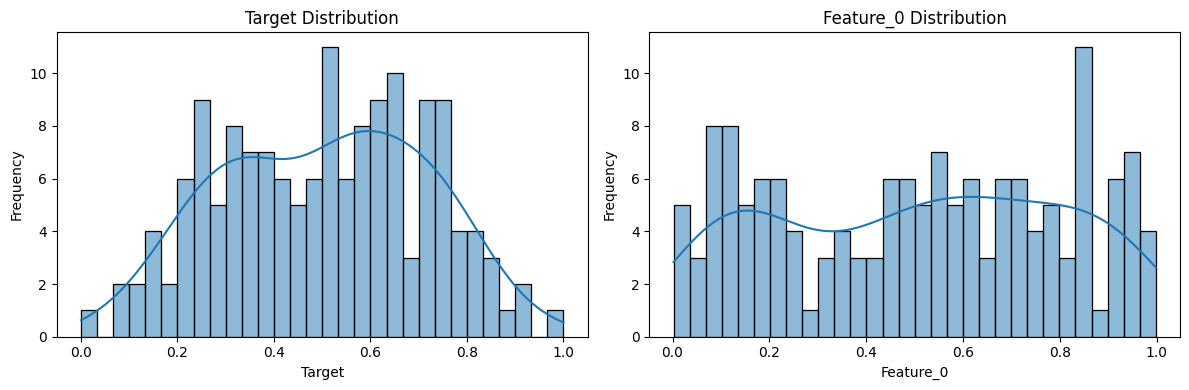


--- Dataset Info ---
Number of features: 20
Number of informative features: 5
Underlying feature distribution: Uniform [0, 1] (plus added noise features)
Train set size: 77
Calibration set size: 43
Test set size: 30
Train+Calibration set size: 120
----------------------------------------
 MEMORIZING  model_selection.py/ModelSelection.model_selection/fe29a2a29b1f30a6/4306882238e6b3d1f3bb393c9be1ed1d
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weigh

/Users/simon/Documents/GitHub/Conformal-Predictive-Decision-Making/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/simon/Documents/GitHub/Conformal-Predictive-Decision-Making/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/simon/Documents/GitHub/Conformal-Predictive-Decision-Making/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/simon/Documents/GitHub/Conformal-Predictive-Decision-Making/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.p

[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best CV Score: -0.026
 MEMORIZING  model_selection.py/ModelSelection.model_selection/fe29a2a29b1f30a6/77c77db2b361b196a118686fd313577d
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=  

/Users/simon/Documents/GitHub/Conformal-Predictive-Decision-Making/.venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-0.04857181 -0.04857181 -0.02931922 -0.02899861 -0.02705014 -0.0267021
 -0.02705215 -0.02646009 -0.0294431  -0.02859098 -0.03098181 -0.0302024
 -0.03098123 -0.03032339 -0.03668884 -0.03555247 -0.03984699 -0.03855914
 -0.04261695 -0.0411242  -0.04701682 -0.04495777         nan         nan
 -0.05343541 -0.05343541 -0.03229252 -0.03183419 -0.02750313 -0.02706951
 -0.02881468 -0.02798019 -0.02897885 -0.02827477 -0.03102666 -0.0302151
 -0.03303083 -0.03209274 -0.0362558  -0.03513574 -0.03922852 -0.03790502
 -0.04303733 -0.04127116 -0.04698521 -0.04460367         nan         nan]
  warnings.warn(


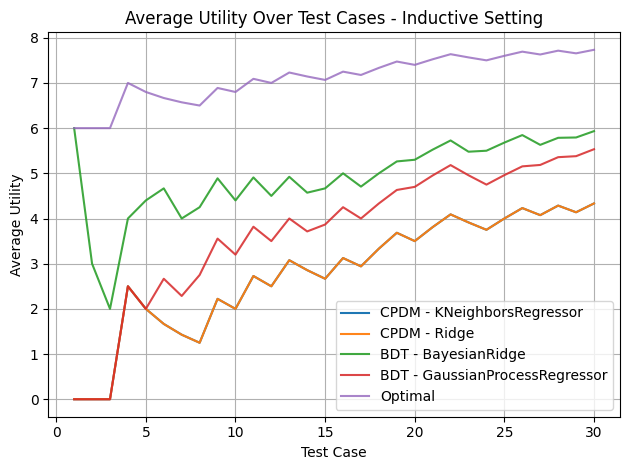

In [17]:
from src.main import Main
import numpy as np

# Parameters for data generation
df_params = {
    'N': 150,
    'F': 20,
    'diabetes': False,
    'feature_target_relationship': "friedman1", # make_regression, friedman1, friedman2, friedman3
    'n_informative': 5, # for make_regression
    'random_state': 2025, # When created only
    'noise': 0.1,
    'train_test_split': 0.2, # How much data goes to testing
    'epsilon': 0.15, # For the calibration split
    'delta': 0.15 # For the calibration split
}

# Utility values for decision outcomes
utility_dict = {
    'tp': 10,
    'tn': 6,
    'fp': 0,
    'fn': -8,
    'threshold': 0.5
}

# Grid search values for ridge and knn
grid_search_space = {
    'knn': {
        'n_neighbors': knn_valid(),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    }
}

# Method configuration
config_dict = {
    'mode': "Inductive",
    'knn': True,
    'ridge': True,
    'gp': True,
    'bayesian_ridge': True,
    'optimal': True,
    'predictive': False,
    'model_selection': True, 
    'grid_search_space': grid_search_space,
    'confidence_n_runs': 10
}

# Plot configuration
plot_config = {
    'average_utility': True,
    'average_utility_with_confidence': False,
    'difference_from_optimal': False,
    'difference_from_optimal_with_confidence': False,
    'regret': False,
    'regret_with_confidence': False
}

# Instantiate and run Main class
main = Main(df_params, utility_dict, config_dict, plot_config)
main.run()